In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
labels= ["airpanes","cars","birds","cars","deer","dogs","frogs","horses","ships","trucks"]

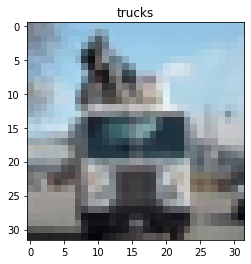

In [16]:
i=1034
import matplotlib.pyplot as plt
plt.imshow(x_train[i])
plt.title(labels[y_train[i][0]])
plt.show()

In [17]:
#Normalization
#from(0-255) to (0-1)
x_train=x_train/255
x_test=x_test/255

In [22]:
import numpy as np
np.max(x_train[9934])

1.0

In [24]:
32*32*1.5

1536.0

In [25]:
#NN architecture

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1536,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 190s 121ms/step - loss: 1.4550 - accuracy: 0.4907
Epoch 2/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.0563 - accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8108 - accuracy: 0.7202
Epoch 4/10
1563/1563 [==============================] - 185s 118ms/step - loss: 0.5641 - accuracy: 0.8062
Epoch 5/10
1563/1563 [==============================] - 185s 119ms/step - loss: 0.3771 - accuracy: 0.8721
Epoch 6/10
1563/1563 [==============================] - 185s 118ms/step - loss: 0.2807 - accuracy: 0.9066
Epoch 7/10
1563/1563 [==============================] - 187s 120ms/step - loss: 0.2050 - accuracy: 0.9324
Epoch 8/10
1563/1563 [==============================] - 188s 120ms/step - loss: 0.1810 - accuracy: 0.9421
Epoch 9/10
1563/1563 [==============================] - 189s 121ms/step - loss: 0.1485 - accuracy: 0.9518
Epoch 10/10
1563/1563 [=======================

In [29]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([3, 8, 8, ..., 2, 4, 4])

In [30]:
y_test.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6263